In [5]:
import sys
sys.path.insert(0, '../../utils/')

In [6]:
import torch
import numpy as np
import pandas as pd
import igraph as ig
import seaborn as sns
from collections import defaultdict

In [7]:
from cellvgae import mean_of_attention_heads
from cellvgae import extract_attn_data

In [8]:
LATENT_DIM = 50
ATTN_HEADS = 10

In [12]:
cellvgae_node_embs = np.load('Darmanis/CellVGAE/cellvgae_node_embs.npy')
cellvgae_umap = np.load('Darmanis/CellVGAE/cellvgae_umap.npy')
cellvgae_clusters = np.load('Darmanis/CellVGAE/cellvgae_clusters.npy')

In [13]:
layer_1_attn_edge_index = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_1_attention_edge_index.pt')
layer_1_attn_coeff = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_1_attention_coeff.pt')

In [14]:
layer_2_attn_edge_index = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_2_attention_edge_index.pt')
layer_2_attn_coeff = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_2_attention_coeff.pt')

In [15]:
layer_mean_attn_edge_index = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_mean_attention_edge_index.pt')
layer_mean_attn_coeff = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_mean_attention_coeff.pt')

In [16]:
layer_std_attn_edge_index = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_std_attention_edge_index.pt')
layer_std_attn_coeff = torch.load('Darmanis/attn_layers_data/darmanis_hidden_layer_std_attention_coeff.pt')

In [17]:
darmanis_df = pd.read_csv('Darmanis/darmanis_ground_truth_clusters.csv')

In [19]:
cell_types = darmanis_df['Cluster'].values.tolist()

In [20]:
num_cells = len(cell_types)

In [22]:
cell_to_cluster = darmanis_df.to_dict()['Cluster']

In [23]:
cell_type_counter = defaultdict(int)
new_cell_clusters = []
for cell_cluster in cell_to_cluster.values():
    cnt = cell_type_counter[cell_cluster]
    cell_type_counter[cell_cluster] += 1
    new_cell_clusters.append(cell_cluster + ' ' + str(cnt))

In [24]:
edge_index, edge_weights = extract_attn_data(layer_2_attn_edge_index, layer_2_attn_coeff, k=80)

In [25]:
edge_index = edge_index.numpy()
edge_weights = edge_weights.detach().numpy()

In [26]:
g = ig.Graph(edges=edge_index, directed=True)
g.es['weight'] = edge_weights
g.vs['name'] = new_cell_clusters

In [27]:
g_selected = g.subgraph(g.vs.select(lambda vertex: vertex.degree() > 0))
layout = g_selected.layout('fr')

In [28]:
palette = sns.color_palette('Set2', num_cells)
color_dict = dict(zip(cell_types, palette))

In [29]:
color_dict

{'fetal_quiescent': (1.0, 0.8509803921568627, 0.1843137254901961),
 'fetal_replicating': (0.7019607843137254,
  0.7019607843137254,
  0.7019607843137254),
 'astrocytes': (1.0, 0.8509803921568627, 0.1843137254901961),
 'neurons': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 'endothelial': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 'oligodendrocytes': (0.9882352941176471,
  0.5529411764705883,
  0.3843137254901961),
 'microglia': (0.4, 0.7607843137254902, 0.6470588235294118),
 'OPC': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411)}

In [30]:
def select_cluster_color_by_cell_with_number(cell_with_number):
    cell_number_split = cell_with_number.split(' ')
    cluster = ' '.join(cell_number_split[:-1])
    return color_dict[cluster]

In [31]:
visual_style = {}
visual_style['vertex_size'] = 35
visual_style['vertex_label'] = g_selected.vs['name']
visual_style['edge_width'] = [10 * w for w in g_selected.es['weight']]
visual_style['vertex_color'] = [select_cluster_color_by_cell_with_number(c_type) for c_type in g_selected.vs['name']]
visual_style['vertex_label_size'] = 10
visual_style['layout'] = layout
visual_style['bbox'] = (1000, 1000)

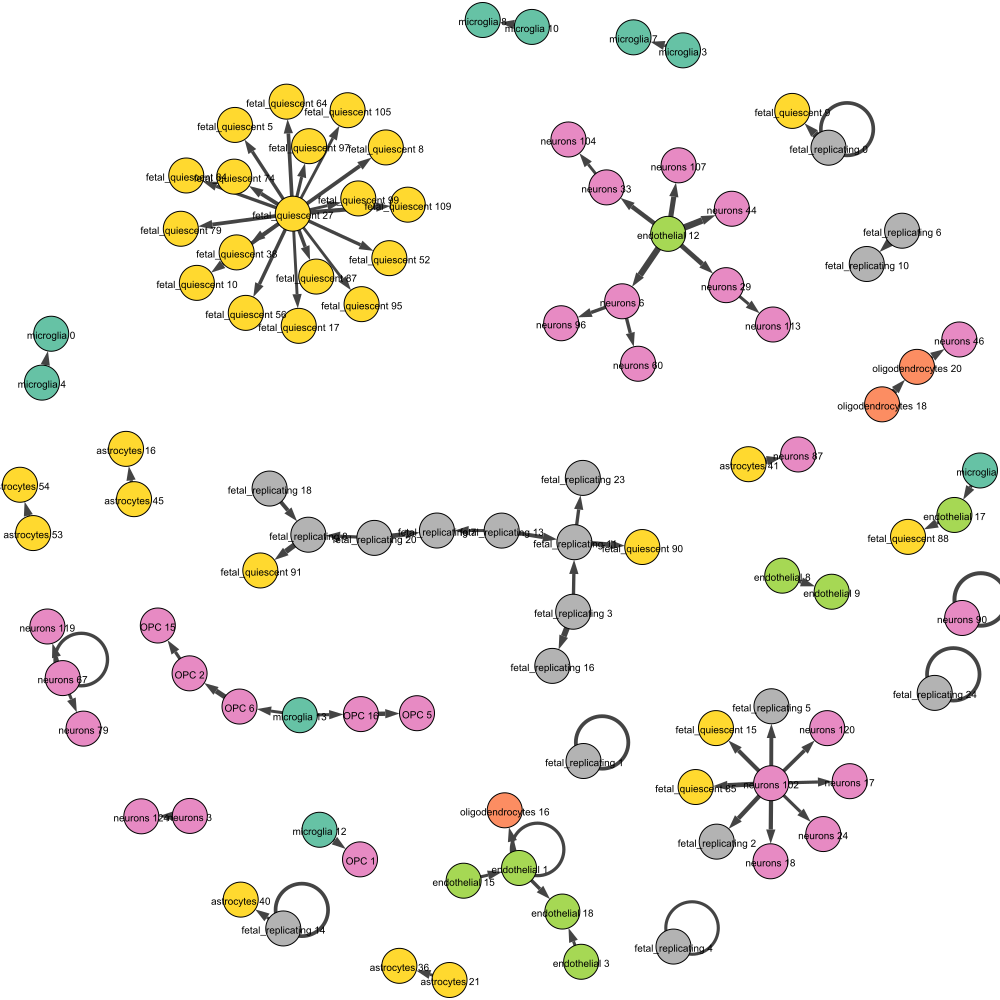

In [32]:
ig.plot(g_selected, **visual_style)

../../utils/attn_graph.py:32: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729002806/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  zero_degrees_indices = (degrees == 0).nonzero()


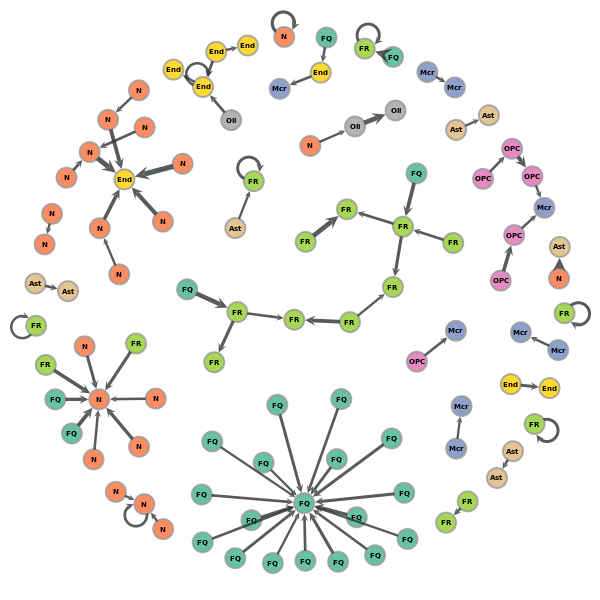

In [17]:
# Graph generated with graph-tool.